# **Mounting drive and importing libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing warnings to ignore filter warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from seaborn import heatmap
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report

# Loading dataset

In [ ]:
ccF = pd.read_csv('/content/drive/MyDrive/Credit Card Fraud/credit_dataset.csv')
ccF.iloc[47]

Unnamed: 0                                   47
ID                                      5008867
GENDER                                        F
CAR                                           Y
REALITY                                       Y
NO_OF_CHILD                                   2
INCOME                                 135000.0
INCOME_TYPE                             Working
EDUCATION_TYPE    Secondary / secondary special
FAMILY_TYPE                             Married
HOUSE_TYPE                    House / apartment
FLAG_MOBIL                                    1
WORK_PHONE                                    0
PHONE                                         0
E_MAIL                                        0
FAMILY SIZE                                 4.0
BEGIN_MONTH                                  25
AGE                                          43
YEARS_EMPLOYED                                9
TARGET                                        0
Name: 47, dtype: object

In [ ]:
creditFcopy=ccF.copy()

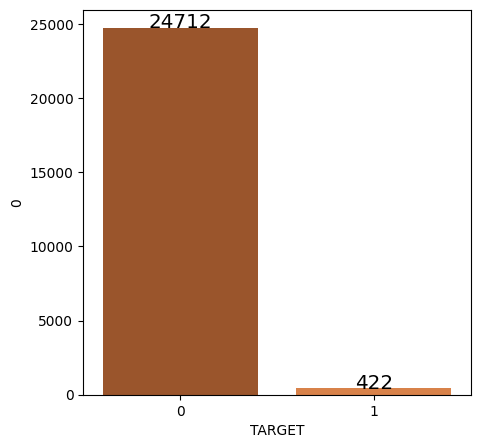

In [ ]:
#Calculating count of Fraud vs No Fraud cases
plt.figure(figsize=(5,5))
target_group = creditFcopy.groupby('TARGET').size().reset_index()
pal = sns.color_palette("Oranges_d", len(target_group))
rank = target_group["TARGET"].argsort().argsort()
g = sns.barplot(x = target_group['TARGET'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['TARGET'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [ ]:
creditFcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [ ]:
creditFcopy.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


### shape of dataset

In [ ]:
print("Rows    :",creditFcopy.shape[0])
print("Columns :",creditFcopy.shape[1])

Rows    : 25134
Columns : 20


checking for NULL VALUES in dataset

In [ ]:
creditFcopy.isna().sum()
#no NULL values!!!

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

datatypes of attributes present in dataset

In [ ]:
creditFcopy.dtypes

Unnamed: 0          int64
ID                  int64
GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
FLAG_MOBIL          int64
WORK_PHONE          int64
PHONE               int64
E_MAIL              int64
FAMILY SIZE       float64
BEGIN_MONTH         int64
AGE                 int64
YEARS_EMPLOYED      int64
TARGET              int64
dtype: object

checking for unique values in dataset

In [ ]:
creditFcopy.nunique()

Unnamed: 0        25134
ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

TARGET column

In [ ]:
print(creditFcopy.TARGET.value_counts(normalize=True))
plt.show()

TARGET
0    0.98321
1    0.01679
Name: proportion, dtype: float64


Not Frauds : 98.32 % of the dataset
Frauds : 1.68 % of the dataset


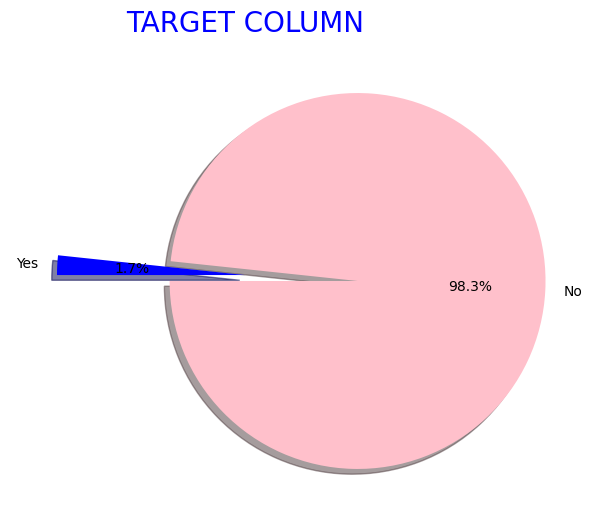

In [ ]:
#creating a pie chart for credit card fraudulent cases

#making labels for pie chart
labels = ['No','Yes']
#calculating values of target column
ccFraud = creditFcopy['TARGET'].value_counts(sort=True)
colours = ['Pink','blue']
explode = (0.6,0)
plt.figure(figsize=(6,6))

plt.pie(ccFraud,colors = colours,shadow =True,startangle=180
        ,autopct="%1.1f%%",explode=explode,labels=labels)
plt.title("TARGET COLUMN",fontsize=20,color="b")
plt.tight_layout()

print('Not Frauds :', round(creditFcopy['TARGET'].value_counts()[0]/len(creditFcopy) * 100,2), '% of the dataset')
print('Frauds :', round(creditFcopy['TARGET'].value_counts()[1]/len(creditFcopy) * 100,2), '% of the dataset')

description of dataset

In [ ]:
creditFcopy.describe()

,Unnamed: 0,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000000,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,12566.500000,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,7255.705169,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,0.000000,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,6283.250000,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,12566.500000,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,18849.750000,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,25133.000000,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


Distribution of continuous

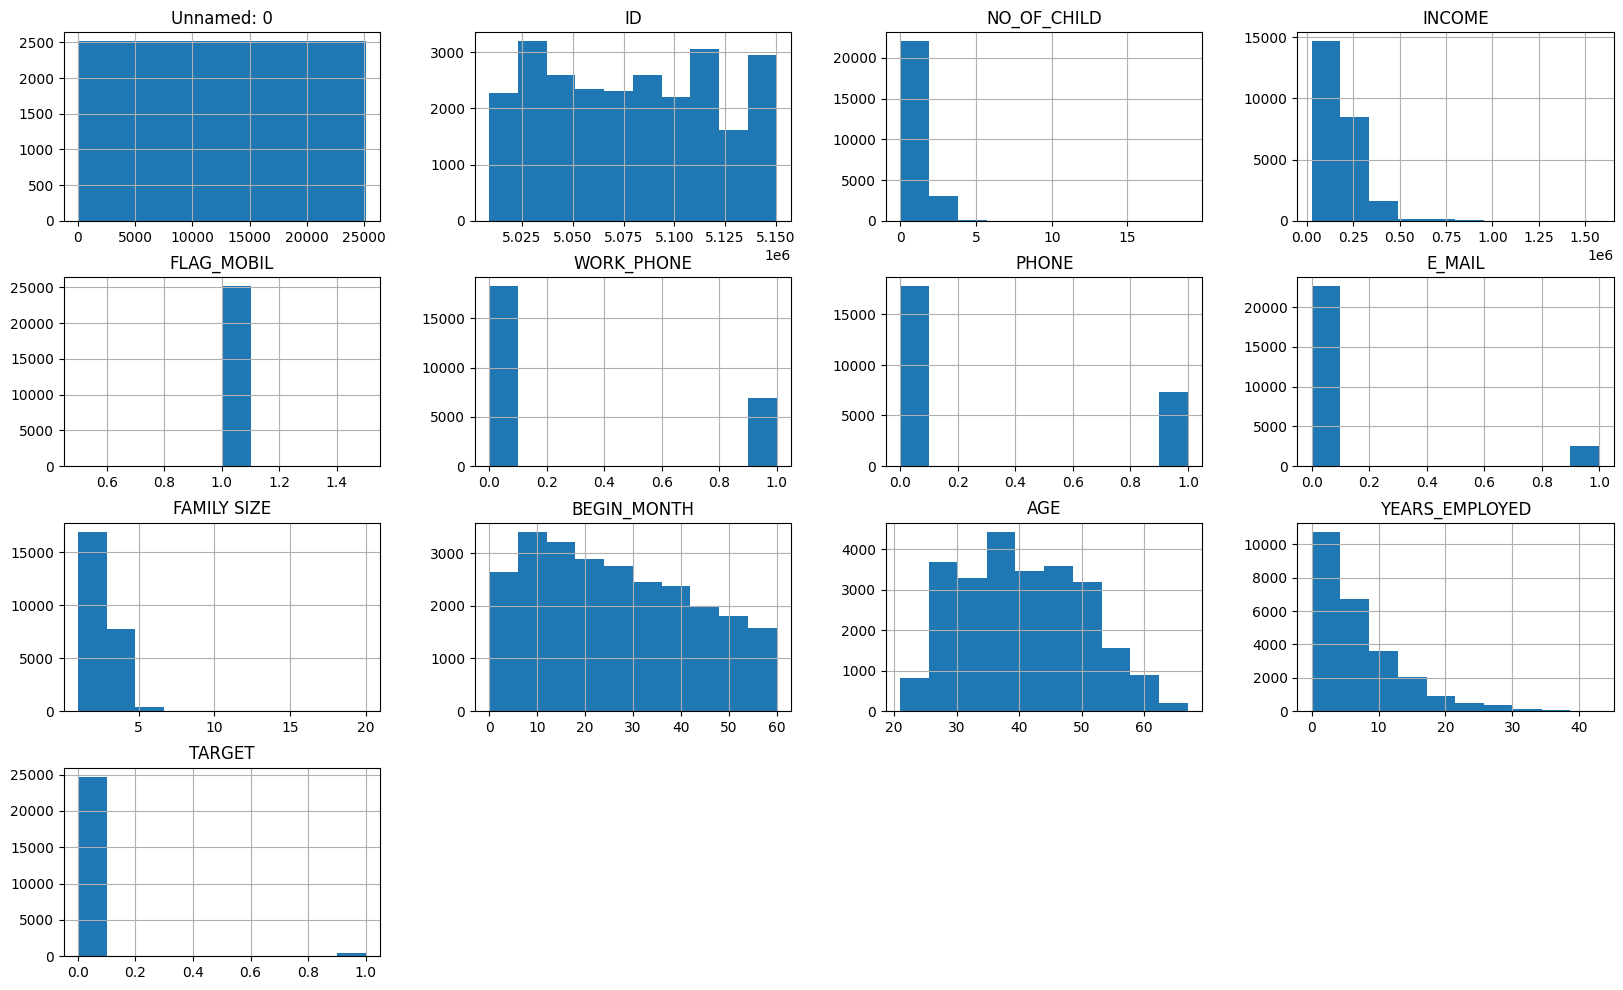

In [ ]:
creditFcopy.hist(figsize=(20,12))
plt.show()

In [ ]:
creditFcopy.describe(include="O")

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
count,25134,25134,25134,25134,25134,25134,25134
unique,2,2,2,5,5,5,6
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,15630,14618,16461,15622,16808,17509,22102


Printing all the Categorical Values that are persent in dataset

In [ ]:
clmns=creditFcopy.describe(include="O").columns
for i in clmns:
    print("Distinct_values :\n 'column_name' =",i)
    print(creditFcopy[i].unique())
    print("")

Distinct_values :
 'column_name' = GENDER
['M' 'F']

Distinct_values :
 'column_name' = CAR
['Y' 'N']

Distinct_values :
 'column_name' = REALITY
['Y' 'N']

Distinct_values :
 'column_name' = INCOME_TYPE
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Distinct_values :
 'column_name' = EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Distinct_values :
 'column_name' = FAMILY_TYPE
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Distinct_values :
 'column_name' = HOUSE_TYPE
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']



Dropping FLAG_MOBIL as all the values is this column is 1
-Correlation Matrix

In [ ]:
numeric_creditFcopy = creditFcopy.select_dtypes(include=['float64', 'int64'])

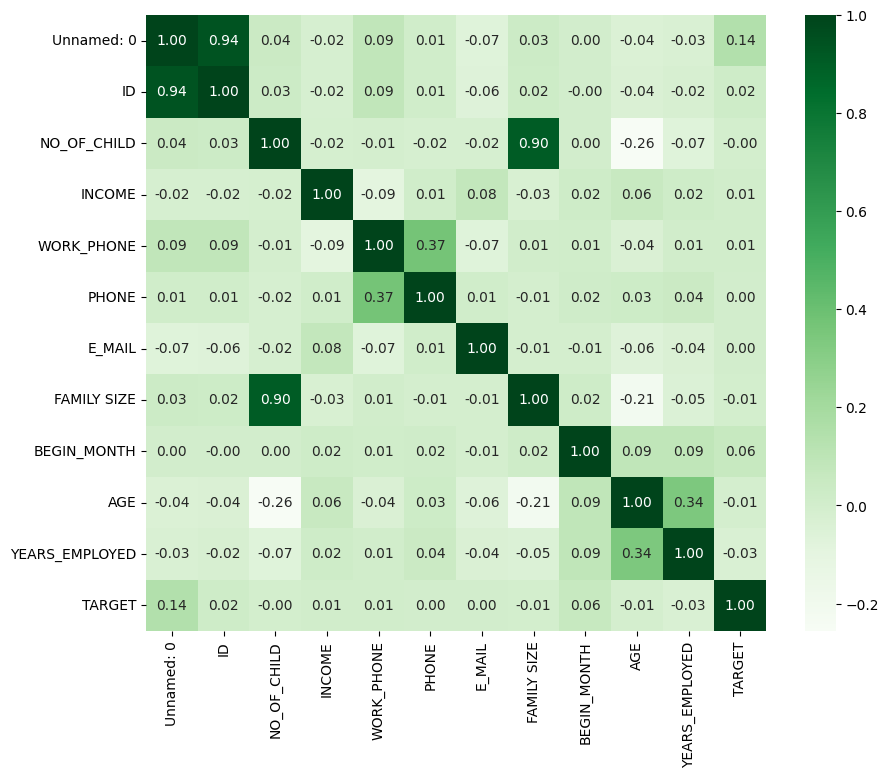

In [ ]:
#heatmap of selected numeric datas From dataset
plt.figure(figsize=(10, 8))
sns.heatmap(creditFcopy.select_dtypes(include=['float64', 'int64']).drop("FLAG_MOBIL", axis=1).corr(), cmap="Greens", annot=True, fmt='.2f')
plt.show()

Representing the relationship between the categorical features and the target variable

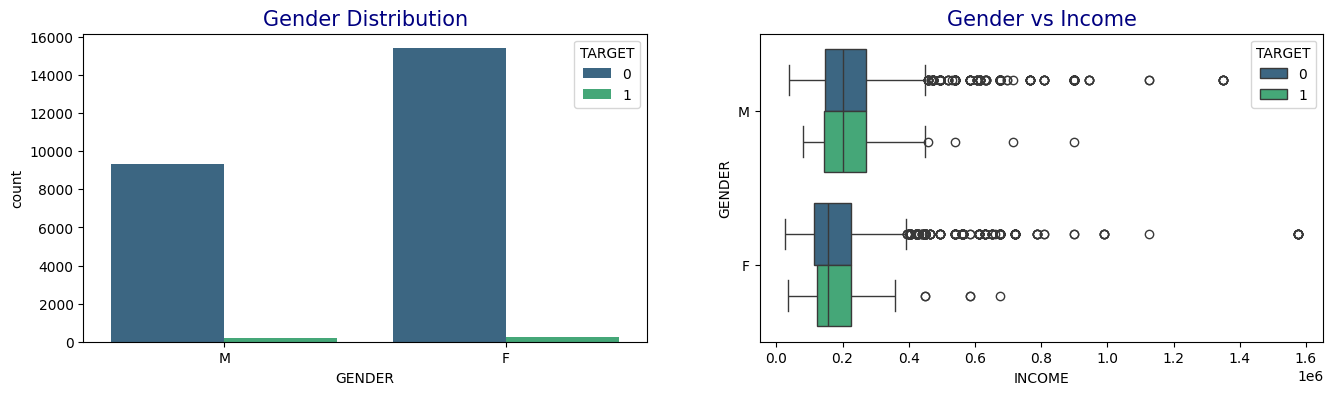

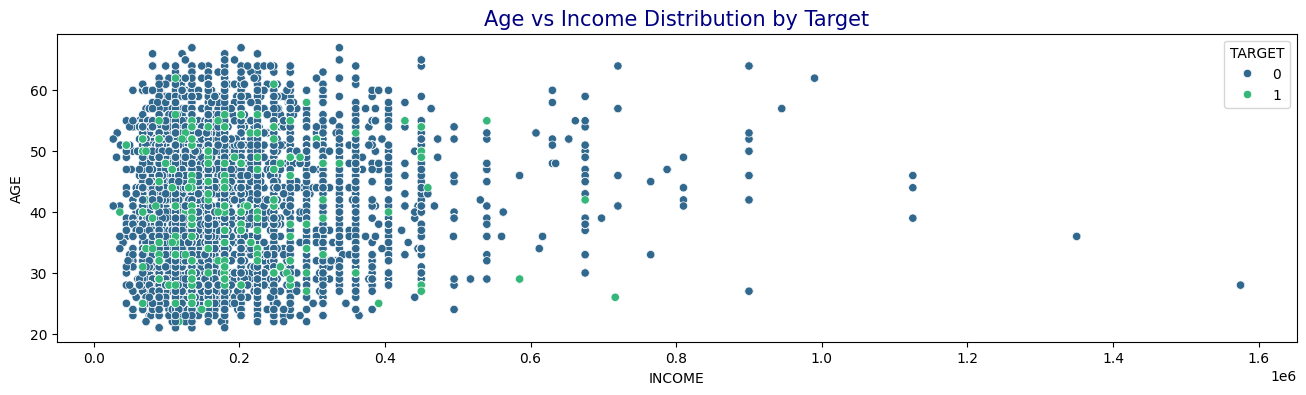

In [ ]:
# Analysis of Gender:
plt.figure(figsize=(16, 4))

# Plot count of individuals by gender, with fraud as the hue.
plt.subplot(121)
sns.countplot(x=creditFcopy["GENDER"], hue="TARGET", data=creditFcopy, palette="viridis")
plt.title("Gender Distribution", fontsize=15, color="navy")

# Boxplot comparing income across genders, with fraud as the hue.
plt.subplot(122)
sns.boxplot(x="INCOME", y="GENDER", hue="TARGET", data=creditFcopy, palette="viridis")
plt.title("Gender vs Income", fontsize=15, color="navy")

# Scatterplot showing the distribution of age versus income, colored by the target variable.
plt.figure(figsize=(16, 4))
sns.scatterplot(x=creditFcopy["INCOME"], y=creditFcopy["AGE"], hue=creditFcopy["TARGET"], palette="viridis")
plt.title("Age vs Income Distribution by Target", fontsize=15, color="navy")
plt.show()


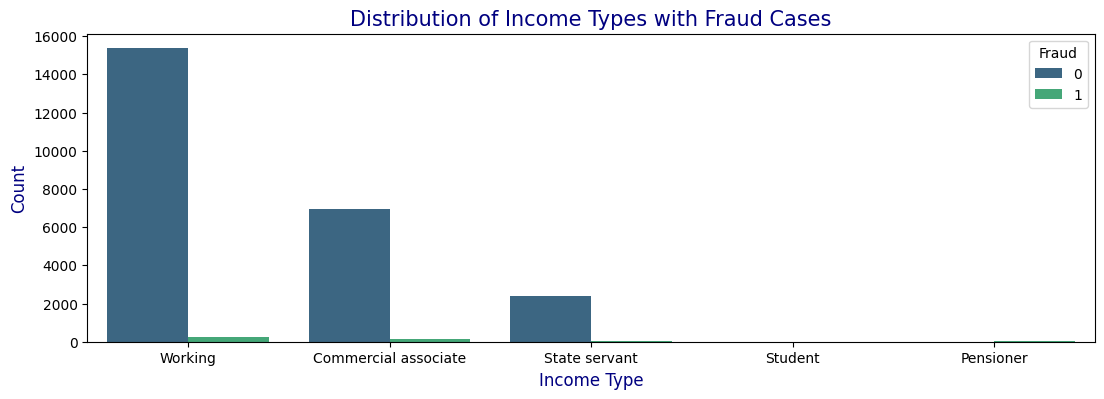

In [ ]:

# Visualizing the distribution of income types
plt.figure(figsize=(13, 4)) # Set the figure size
sns.countplot(x=creditFcopy["INCOME_TYPE"], hue="TARGET", data=creditFcopy, palette="viridis")
plt.title("Distribution of Income Types with Fraud Cases", fontsize=15, color="navy")
plt.xlabel("Income Type", fontsize=12, color="navy")
plt.ylabel("Count", fontsize=12, color="navy")
plt.legend(title="Fraud", fontsize=10, title_fontsize=10, loc="upper right")
plt.show()



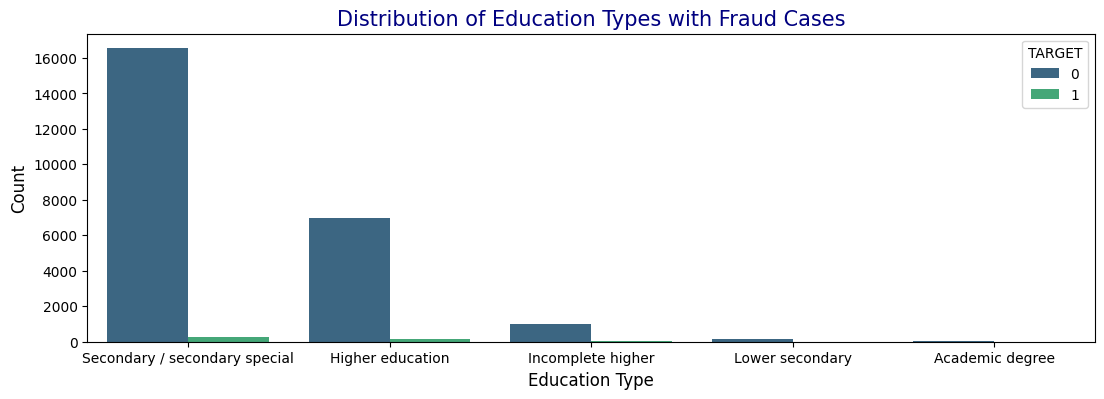

In [ ]:
# Visualizing the distribution of education types
# Setting the figure size for clarity
plt.figure(figsize=(13, 4))

# Plotting a count of individuals based on their education type, with fraud as the hue
sns.countplot(x=creditFcopy["EDUCATION_TYPE"], hue="TARGET", data=creditFcopy, palette="viridis")

plt.title("Distribution of Education Types with Fraud Cases", fontsize=15, color="navy")
plt.xlabel("Education Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Displaying the plot
plt.show()


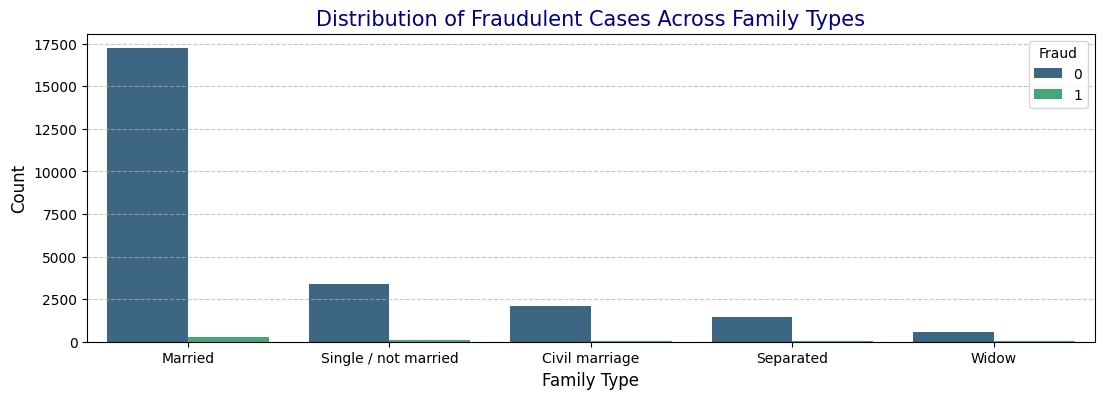

In [ ]:
# Analyzing fraudulent cases across family types
plt.figure(figsize=(13,4))
sns.countplot(data=creditFcopy, x="FAMILY_TYPE", hue="TARGET", palette="viridis")  # Count plot with hue representing fraud
plt.title("Distribution of Fraudulent Cases Across Family Types", fontsize=15, color="navy")
plt.xlabel("Family Type", fontsize=12)  # X-axis label
plt.ylabel("Count", fontsize=12)  # Y-axis label
plt.legend(title="Fraud", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines for better visualization
plt.show()


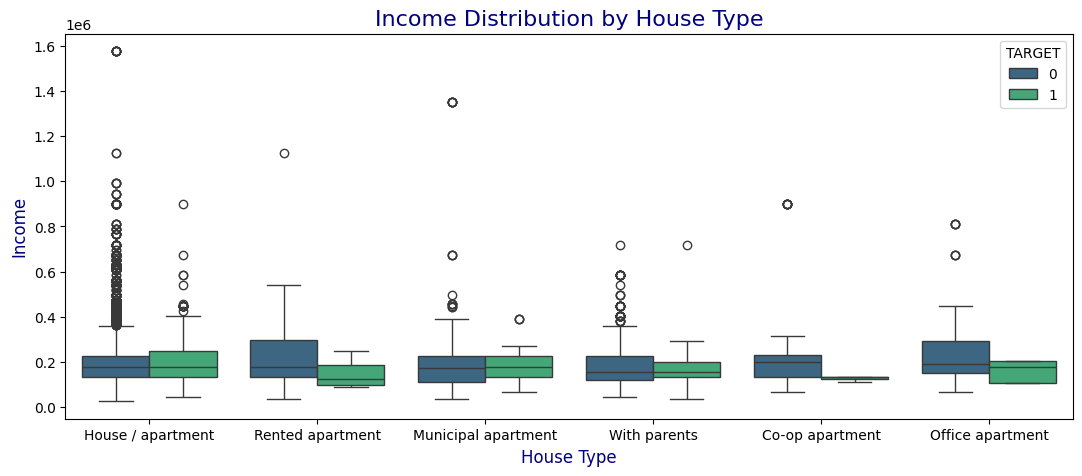

In [ ]:
#distribution of income among different house types,fraudulent cases.

plt.figure(figsize=(13, 5))
#boxplot to show the income distribution
sns.boxplot(x="HOUSE_TYPE", y="INCOME", data=creditFcopy, hue="TARGET", palette="viridis")

plt.title("Income Distribution by House Type", fontsize=16, color="navy")
plt.xlabel("House Type", fontsize=12, color="navy")
plt.ylabel("Income", fontsize=12, color="navy")
plt.show()


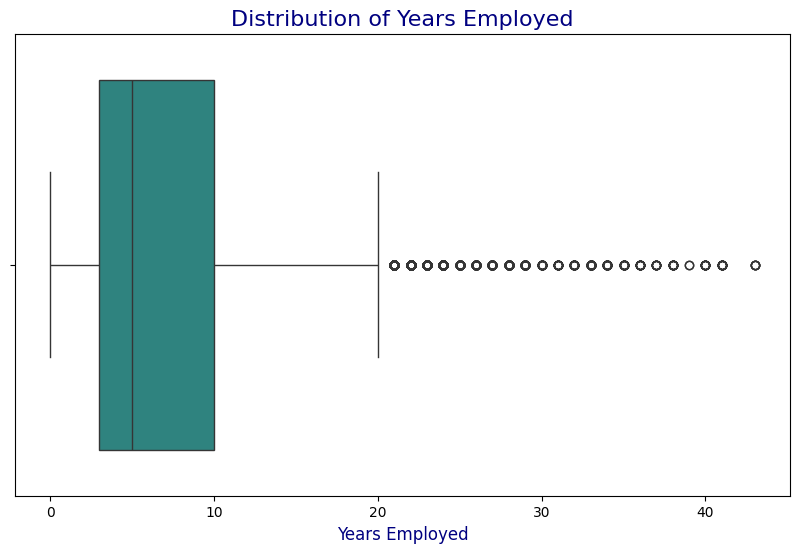

In [ ]:
#distribution of years employed using a boxplot.

plt.figure(figsize=(10, 6))
sns.boxplot(x=creditFcopy["YEARS_EMPLOYED"], palette="viridis")
plt.title("Distribution of Years Employed", fontsize=16, color="navy")
plt.xlabel("Years Employed", fontsize=12, color="navy")
plt.show()

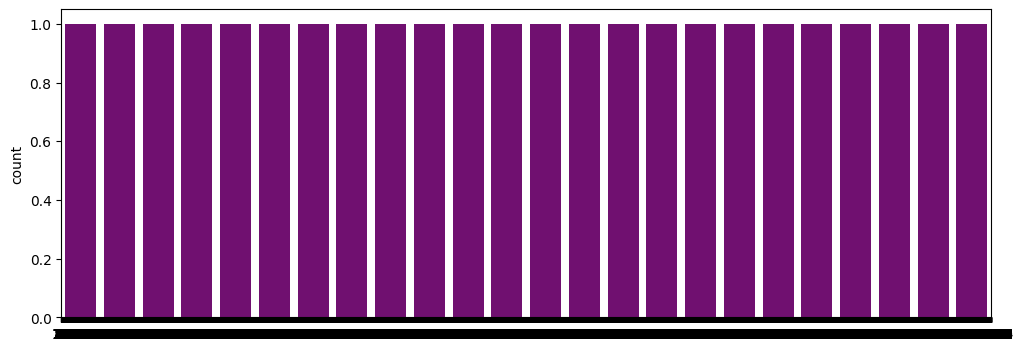

In [ ]:
#distribution of the "YEARS_EMPLOYED"

plt.figure(figsize=(12, 4))
sns.countplot(creditFcopy["YEARS_EMPLOYED"], color="purple")
plt.show()

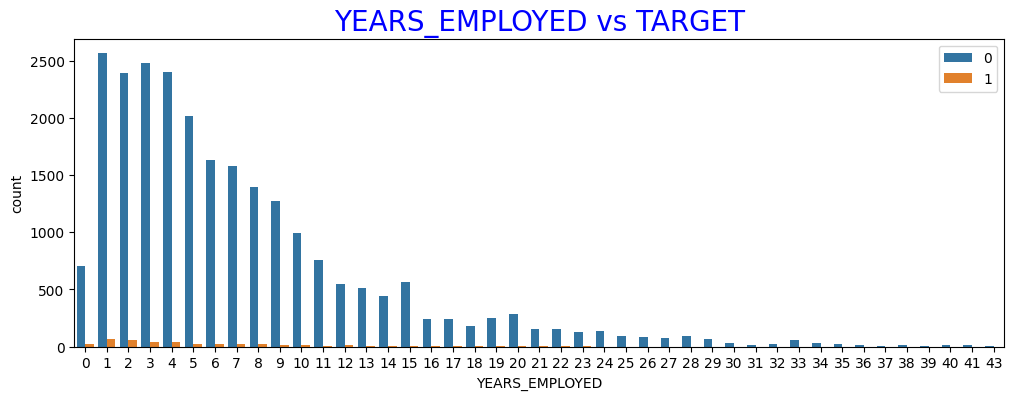

In [ ]:
#relationship between the YEARS_EMPLOYED & TARGET

plt.figure(figsize=(12, 4))
sns.countplot(x="YEARS_EMPLOYED", hue="TARGET", data=creditFcopy)
plt.title("YEARS_EMPLOYED vs TARGET", fontsize=20, color="blue")
plt.legend()
plt.show()

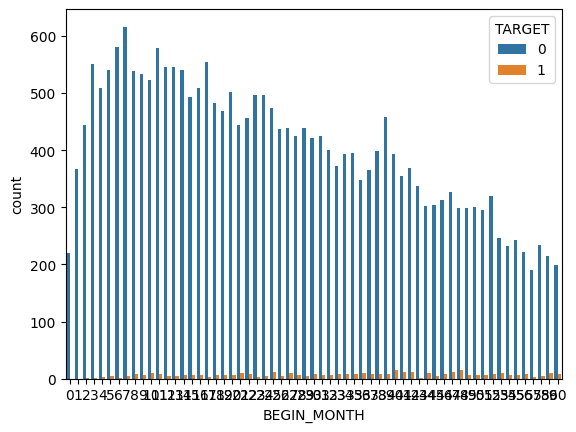

In [ ]:
#distribution of the BEGIN_MONTH

sns.countplot(x="BEGIN_MONTH", hue="TARGET", data=creditFcopy)
plt.show()


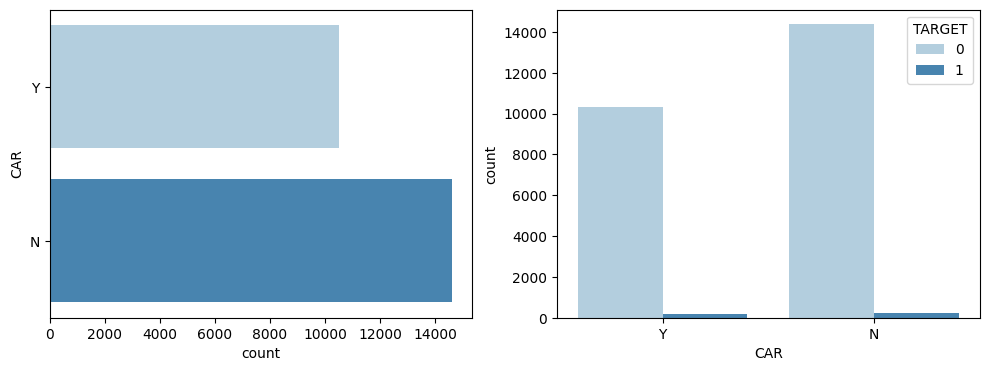

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#distribution of CAR column
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.countplot(creditFcopy["CAR"], palette="Blues")
plt.subplot(122)
#relationship between CAR and TARGET
sns.countplot(x=creditFcopy["CAR"], hue="TARGET", data=creditFcopy, palette="Blues")
plt.show()

Detecting Outliers

In [ ]:
#these columns have continuous values
continuous =creditFcopy[["INCOME","BEGIN_MONTH","AGE","YEARS_EMPLOYED"]]

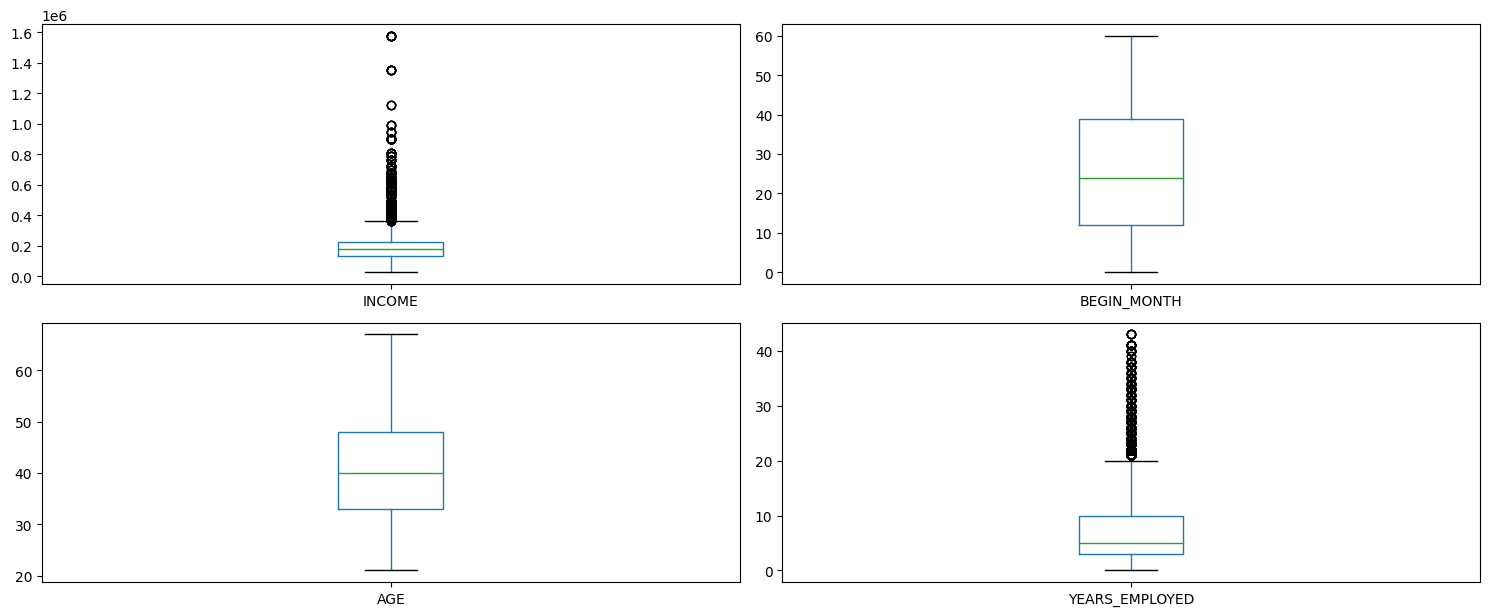

In [ ]:
#detecting outliers using boxplot
plt.figure(figsize=(15,12))

for i ,clmns in enumerate(list(continuous.columns)):
    plt.subplot(4,2,i+1)
    continuous.boxplot(clmns)
    plt.grid()
    plt.tight_layout()

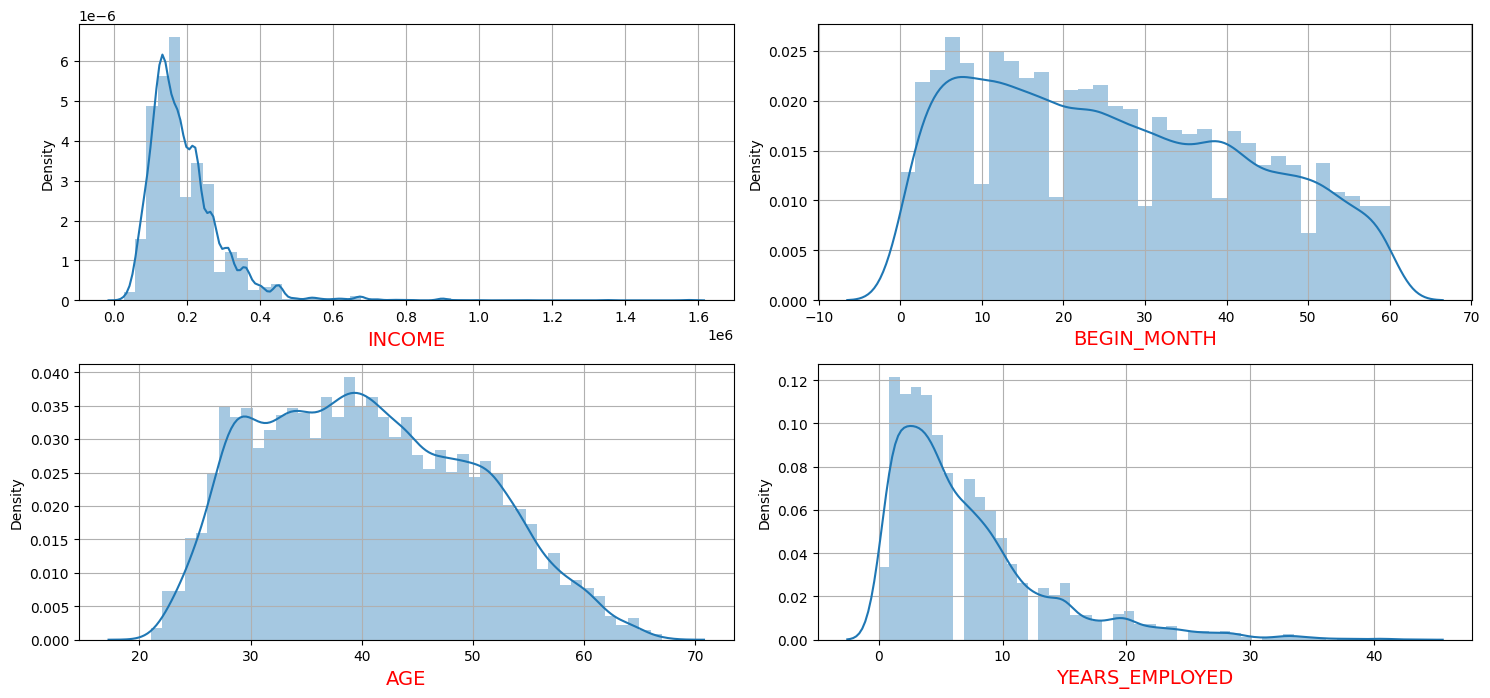

In [ ]:
#distribution of continuous values
#shown in a histogram
plt.figure(figsize=(15,10))

for i ,clmns in enumerate(list(continuous.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(continuous[clmns])
    plt.xlabel(clmns,fontsize=14,color="Red")
    plt.grid()
    plt.tight_layout()

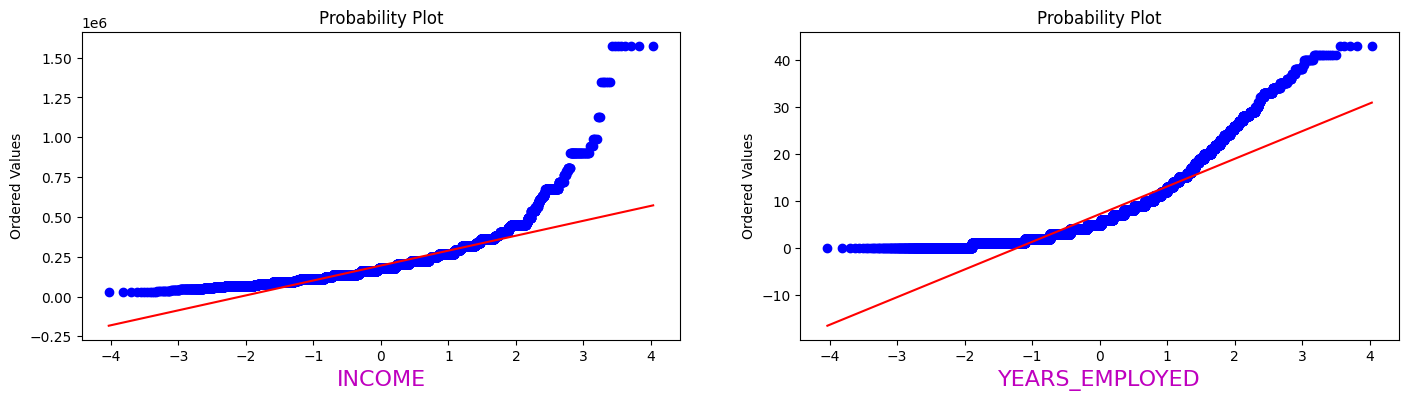

In [ ]:
#checking to see if the INCOMJE & YEARS EMPLOYED columns follow the normal distribution

plt.figure(figsize=(17,4))

plt.subplot(121)
res=stats.probplot(creditFcopy.INCOME,plot=plt,dist="norm")
plt.xlabel("INCOME",fontsize=16,color="m")

plt.subplot(122)
res=stats.probplot(creditFcopy.YEARS_EMPLOYED,plot=plt,dist="norm")
plt.xlabel("YEARS_EMPLOYED",fontsize=16,color="m")

plt.show()

In [ ]:
#exclude rows where the "INCOME" column exceeds 600,000 to remove outlier values, which could skew thr model predictions.
creditFcopy=creditFcopy[creditFcopy['INCOME'] < 600000]

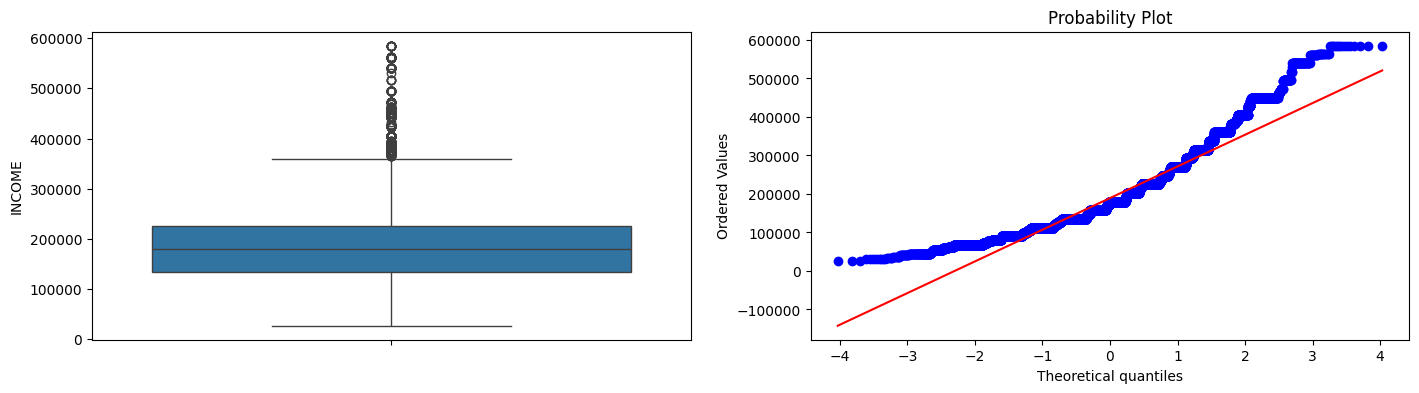

In [ ]:
#distribution of INCOME
plt.figure(figsize=(17,4))

plt.subplot(121)
sns.boxplot(creditFcopy.INCOME)
#checking if it follow a normal distribution
plt.subplot(122)
res=stats.probplot(creditFcopy.INCOME,plot=plt,dist="norm")

In [ ]:
#removing rows with years employed columns exceed 20 to remove outliers which interfere with our analysis
creditFcopy=creditFcopy[creditFcopy['YEARS_EMPLOYED'] < 20]

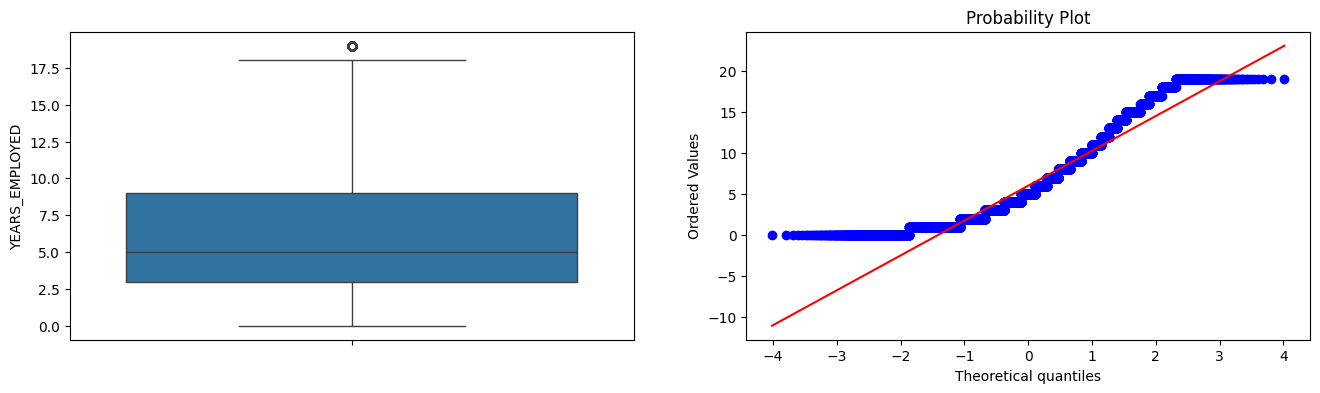

In [ ]:
#distribution of yhears_employed
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.boxplot(creditFcopy.YEARS_EMPLOYED)
plt.subplot(122)
#checking if years_employed follows normal distribution
res=stats.probplot(creditFcopy.YEARS_EMPLOYED,plot=plt,dist="norm")

In [ ]:
#dropping ID column
creditFcopy.drop(columns={"ID"},inplace=True,axis=1)

In [ ]:
#everyone has phone
creditFcopy.drop("FLAG_MOBIL",inplace=True,axis=1)

In [ ]:
#converting float data types to integers
floats=["INCOME","FAMILY SIZE","BEGIN_MONTH"]

for i in floats:
    creditFcopy[i]=creditFcopy[i].astype("int64")

## Feature Engineering--- Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#applying label encoding to categorical columns
labels=["GENDER","CAR","REALITY","INCOME_TYPE","EDUCATION_TYPE","HOUSE_TYPE","FAMILY_TYPE"]
label=LabelEncoder()

for i in labels:
    creditFcopy[i]=label.fit_transform(creditFcopy[i])

In [ ]:
#dataset after using LabelEncoder
creditFcopy.head()

,Unnamed: 0,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,1,1,1,0,112500,4,4,1,1,0,0,0,2,29,59,3,0
1,1,0,0,1,0,270000,0,4,3,1,0,1,1,1,4,52,8,0
2,2,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
3,3,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
4,4,0,0,1,0,270000,0,4,3,1,0,1,1,1,38,52,8,0


In [ ]:
#calculating correlation matrix of the dataset
creditFcopy.corr()

,Unnamed: 0,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
Unnamed: 0,1.000000,0.012431,-0.032663,-0.099639,0.038721,-0.019835,0.025976,-0.008697,0.010353,0.010788,0.092292,0.013909,-0.069763,0.032133,0.000425,-0.040186,-0.027076,0.145188
GENDER,0.012431,1.000000,0.335480,-0.038093,0.007133,0.215555,0.054693,0.049496,-0.048857,0.050642,0.016151,-0.022394,-0.029970,0.033294,-0.004875,-0.088454,-0.074834,0.018699
CAR,-0.032663,0.335480,1.000000,0.010930,0.060831,0.213636,0.001591,-0.072167,-0.098587,0.005645,-0.024479,-0.025668,0.001649,0.104713,0.026117,-0.052365,-0.002096,-0.003231
REALITY,-0.099639,-0.038093,0.010930,1.000000,0.021140,0.030626,-0.029387,0.008892,0.001889,-0.176601,-0.207793,-0.060026,0.062439,0.021296,-0.011152,0.089129,-0.008422,-0.022924
NO_OF_CHILD,0.038721,0.007133,0.060831,0.021140,1.000000,-0.034394,0.041044,-0.024205,-0.161934,0.004803,-0.000719,-0.013026,-0.016472,0.905458,0.006449,-0.238263,0.015776,-0.003085
INCOME,-0.019835,0.215555,0.213636,0.030626,-0.034394,1.000000,-0.151565,-0.201597,0.036170,-0.007361,-0.098489,0.006639,0.068385,-0.045235,0.031696,0.053488,0.044452,0.011164
INCOME_TYPE,0.025976,0.054693,0.001591,-0.029387,0.041044,-0.151565,1.000000,0.105883,-0.012714,-0.008985,0.079314,0.002694,-0.042644,0.043303,-0.005473,0.001142,0.024137,-0.001414
EDUCATION_TYPE,-0.008697,0.049496,-0.072167,0.008892,-0.024205,-0.201597,0.105883,1.000000,-0.001881,-0.029707,0.007729,-0.054091,-0.105592,-0.019444,-0.013024,0.144156,0.020961,-0.010094
FAMILY_TYPE,0.010353,-0.048857,-0.098587,0.001889,-0.161934,0.036170,-0.012714,-0.001881,1.000000,0.040743,-0.048622,-0.026204,-0.013375,-0.520295,-0.042932,0.011540,-0.033102,0.022860
HOUSE_TYPE,0.010788,0.050642,0.005645,-0.176601,0.004803,-0.007361,-0.008985,-0.029707,0.040743,1.000000,0.002463,-0.024382,-0.007611,-0.018643,-0.028966,-0.181886,-0.056428,0.001291


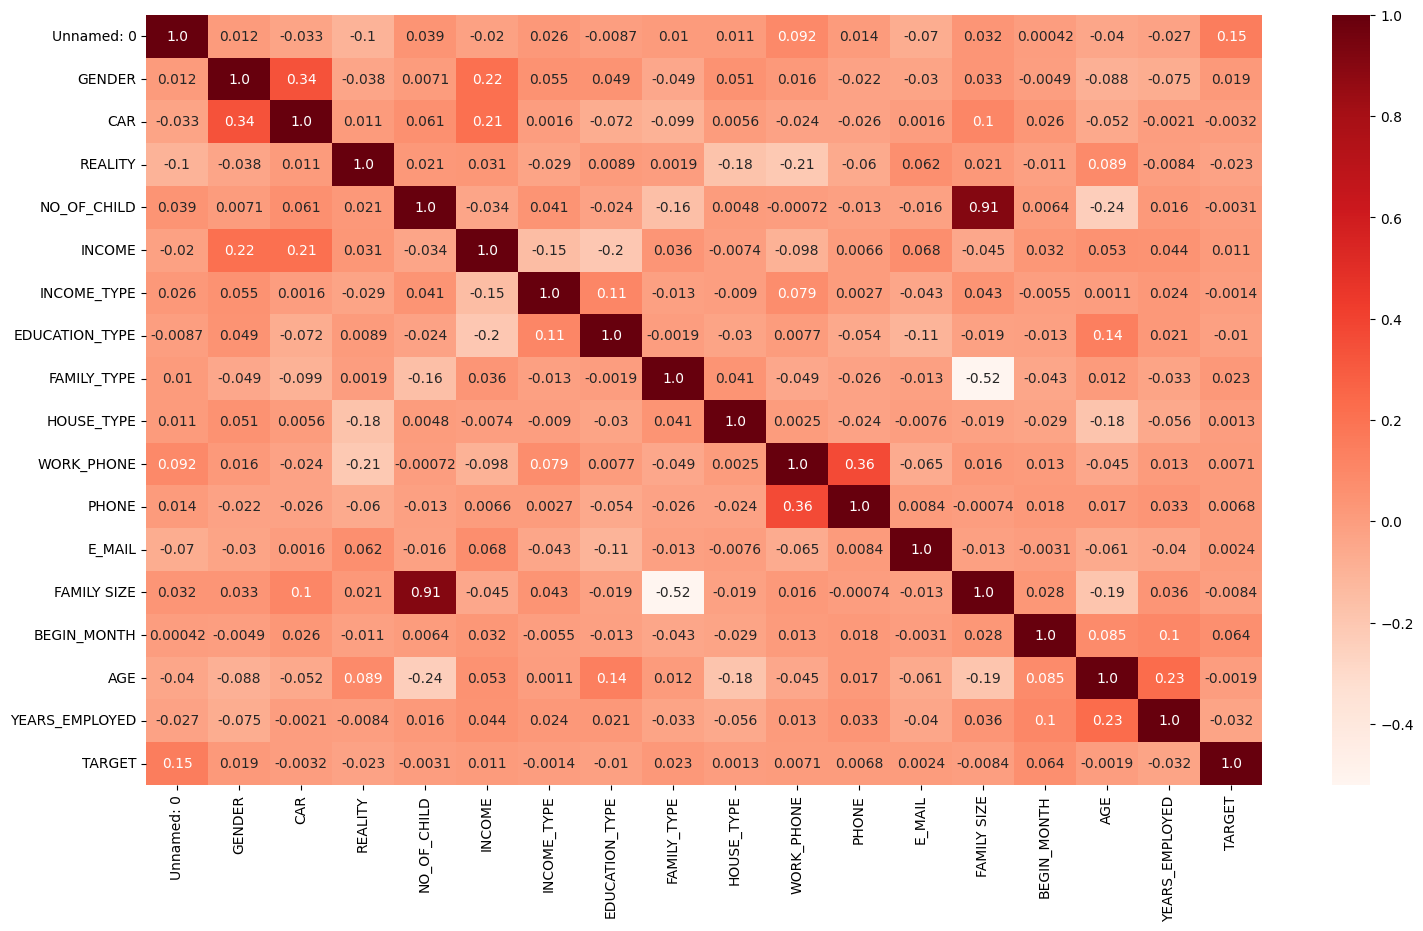

In [ ]:
#generates the heatmap of the dataset
plt.figure(figsize=(18,10))
sns.heatmap(creditFcopy.corr(),annot=True,fmt='.2',cmap="Reds")
plt.show()

In [ ]:
#FAMILY_SIZE and NO_OF_CHILD are highly correlated to each other so we can drop one feature from the dataset
creditFcopy.drop('NO_OF_CHILD',inplace=True,axis=1)

# Feature Selection

In [ ]:
from sklearn.tree import ExtraTreeClassifier

In [ ]:
# Creating feature set X by dropping the "TARGET" column
X = creditFcopy.drop("TARGET", axis=1)
# Creating target variable y containing values of the "TARGET" column
y = creditFcopy.TARGET

In [ ]:
print("X :",X.shape)
print("y :",y.shape)

X : (23361, 16)
y : (23361,)


In [ ]:
# Creating an instance of the ExtraTreeClassifier model
app = ExtraTreeClassifier()
# Fitting the model to the data
app.fit(X, y)

ExtraTreeClassifier()

In [ ]:
#contains the importance of each feature in the trained model
print(app.feature_importances_)

[3.65659512e-01 3.49644894e-04 2.51174081e-02 2.01798275e-02
 7.45446523e-02 3.63600641e-02 3.45350004e-02 3.51348236e-02
 3.40569437e-02 2.74105197e-02 3.31543690e-02 1.08574417e-02
 3.79760229e-02 1.11137640e-01 6.48042476e-02 8.87218827e-02]


In [ ]:
feature=pd.Series(app.feature_importances_,index=X.columns)

In [ ]:
#Transforms the feature importances into DataFrame,sorting according to scores and then selecting the 12 features with the highest scores. doing this
#to identify the most imp features
fF=feature.to_frame().reset_index()
fF.columns=["Features","Scores"]
features=fF.sort_values(by="Scores",ascending=False)
top_features=features.nlargest(12,"Scores")
top_features

,Features,Scores
0,Unnamed: 0,0.365660
13,BEGIN_MONTH,0.111138
15,YEARS_EMPLOYED,0.088722
4,INCOME,0.074545
14,AGE,0.064804
12,FAMILY SIZE,0.037976
5,INCOME_TYPE,0.036360
7,FAMILY_TYPE,0.035135
6,EDUCATION_TYPE,0.034535
8,HOUSE_TYPE,0.034057


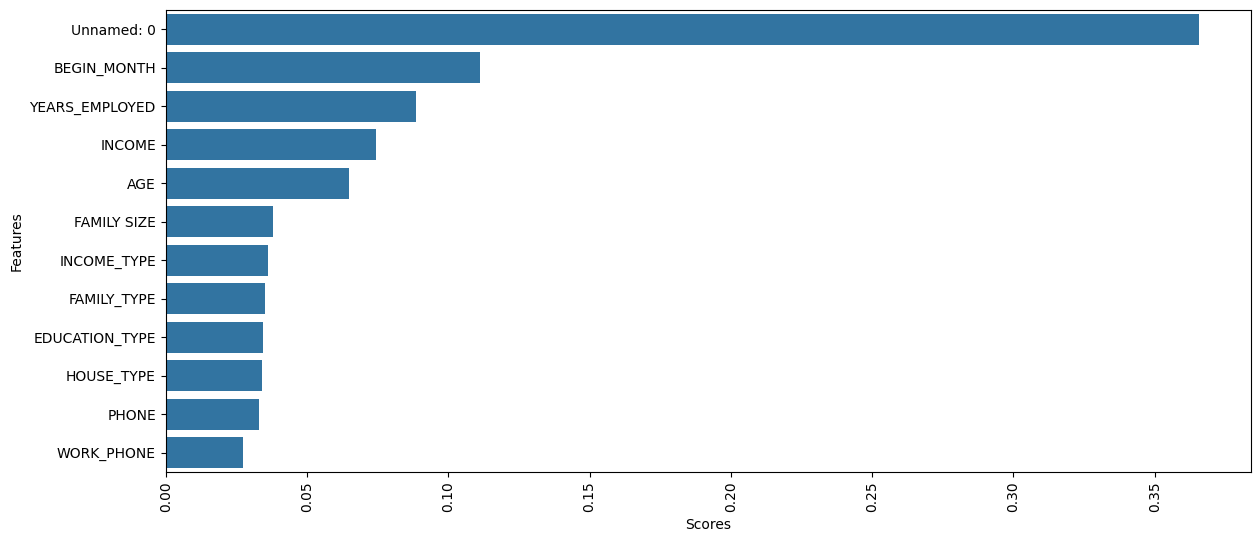

In [ ]:
#visualizing the 12 features
plt.figure(figsize=(14,6))
sns.barplot(y="Features",x="Scores",data=top_features)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Selecting specific columns from creditFcopy
updatedData=creditFcopy[["GENDER","BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE"
                  ,"PHONE","HOUSE_TYPE","EDUCATION_TYPE","TARGET"]]

In [ ]:
updatedData.shape

(23361, 13)

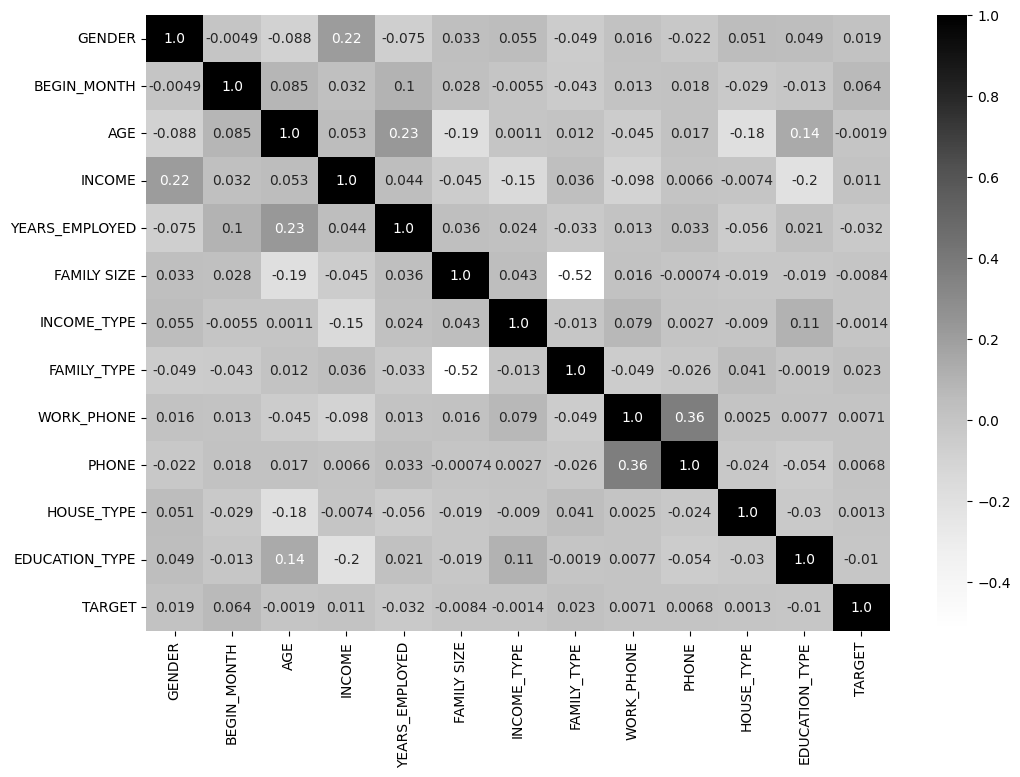

In [ ]:
#heatmap of updatedData
plt.figure(figsize=(12,8))
sns.heatmap(updatedData.corr(),fmt='.2',annot=True,cmap="Greys")
plt.show()

In [ ]:
updatedData.head()

,GENDER,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,FAMILY SIZE,INCOME_TYPE,FAMILY_TYPE,WORK_PHONE,PHONE,HOUSE_TYPE,EDUCATION_TYPE,TARGET
0,1,29,59,112500,3,2,4,1,0,0,1,4,0
1,0,4,52,270000,8,1,0,3,0,1,1,4,0
2,0,26,52,270000,8,1,0,3,0,1,1,4,0
3,0,26,52,270000,8,1,0,3,0,1,1,4,0
4,0,38,52,270000,8,1,0,3,0,1,1,4,0


In [ ]:
## Create dummy variables for specified categorical columns
#doing this so that the categorical data can be converted in such a format that is better for ML which is mostly numerical values

dummy_vals= pd.get_dummies(updatedData, columns=["GENDER", "FAMILY SIZE", "INCOME_TYPE", "FAMILY_TYPE", "WORK_PHONE", "PHONE", "HOUSE_TYPE", "EDUCATION_TYPE"], drop_first=True)

In [ ]:
#shape of the dataset after creating dummy variables
dummy_vals.shape

(23361, 34)

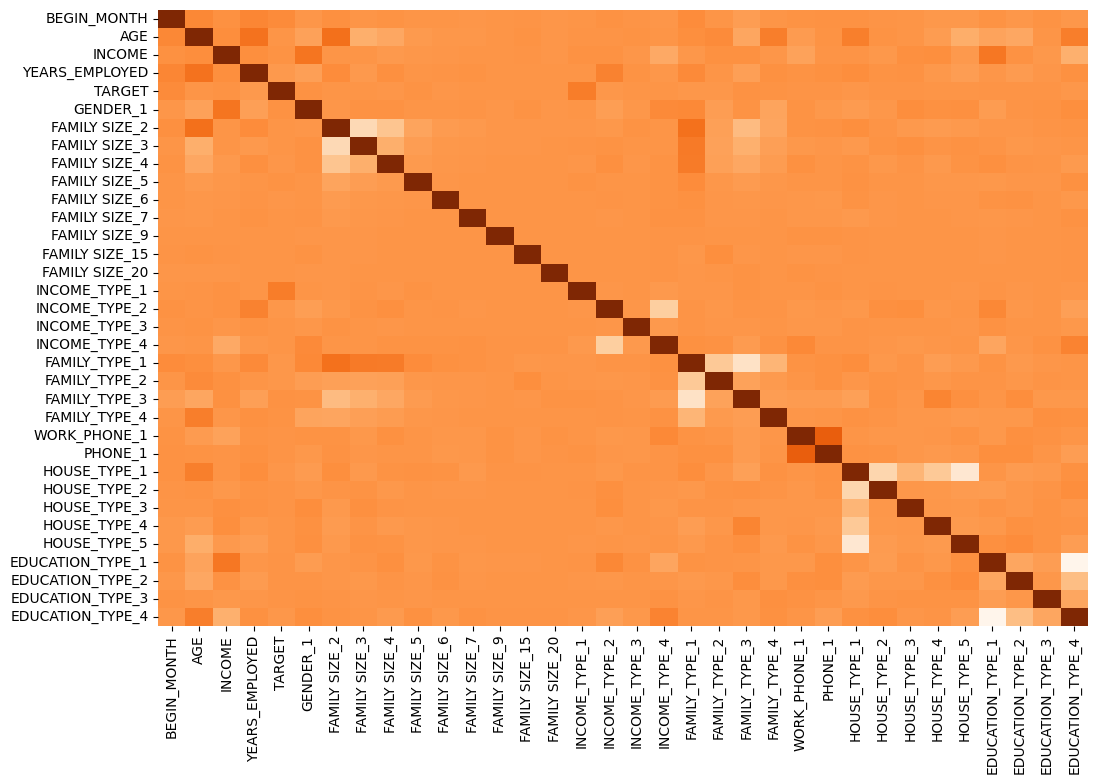

In [ ]:
#correlation matrix of dummy_vals
plt.figure(figsize=(12, 8))
sns.heatmap(dummy_vals.corr(), fmt='.2', cbar=False, cmap="Oranges")
plt.show()

In [ ]:
creditFcopy.head()

,Unnamed: 0,GENDER,CAR,REALITY,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,1,1,1,112500,4,4,1,1,0,0,0,2,29,59,3,0
1,1,0,0,1,270000,0,4,3,1,0,1,1,1,4,52,8,0
2,2,0,0,1,270000,0,4,3,1,0,1,1,1,26,52,8,0
3,3,0,0,1,270000,0,4,3,1,0,1,1,1,26,52,8,0
4,4,0,0,1,270000,0,4,3,1,0,1,1,1,38,52,8,0


# Data divide: X, y & Scaling & Splitting (train, test)

In [ ]:
#Splitting the dataset into input and output
X=creditFcopy.drop("TARGET",axis=1)
y=creditFcopy.TARGET

In [ ]:
#splits the data into training and testing
#70% used for training,30% used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0) #data is split in the same way each time the code is run

In [ ]:
#prints the shapes of the training and testing sets after splitting the data
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (16352, 16)
X_test:  (7009, 16)
y_train:  (16352,)
y_test:  (7009,)


## Feature scaling

In [ ]:
#performs feature scaling in feature X
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()# Create a MinMaxScaler object
X=scalar.fit_transform(X)

# Machine Learning Algorithm

Accuracy by using KNN: 0.9917249250963047
Precision by using KNN: 0.9909372159111629
Recall by using KNN: 0.9917249250963047
F1 Score: 0.9909357910905382
classification report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6904
           1       0.83      0.56      0.67       105

    accuracy                           0.99      7009
   macro avg       0.91      0.78      0.83      7009
weighted avg       0.99      0.99      0.99      7009



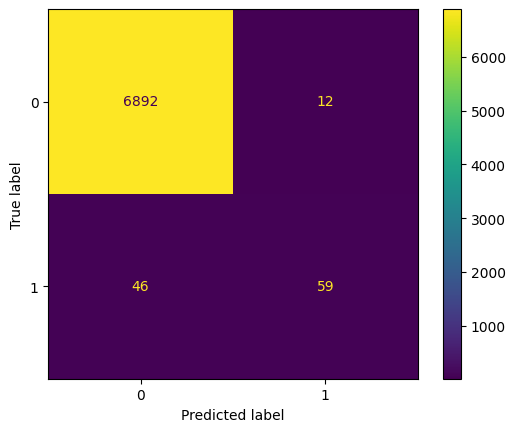

In [ ]:
#Machine Learning Algorithm : KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predKNN_y = knn.predict(X_test)
#accuracy
acc_KNN = accuracy_score(y_test, predKNN_y)
print("Accuracy by using KNN:", acc_KNN)
#precision
pre_KNN = precision_score(y_test, predKNN_y, average='weighted')
print('Precision by using KNN:', pre_KNN)
#recall
rec_KNN = recall_score(y_test, predKNN_y, average='weighted')
print('Recall by using KNN:', rec_KNN)
#f1 score
f1_KNN = f1_score(y_test, predKNN_y, average='weighted')
print("F1 Score:", f1_KNN)
#confusion matrix
cm = confusion_matrix(y_test, predKNN_y, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
print('classification report:',classification_report(y_test,predKNN_y))

disp.plot()
plt.show()

Accuracy: 0.9888714509915822
Precision: 0.989977992104283
Recall: 0.9888714509915822
F1 Score: 0.9893472297641006
classification report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99      6904
           1       0.61      0.72      0.66       105

    accuracy                           0.99      7009
   macro avg       0.80      0.86      0.83      7009
weighted avg       0.99      0.99      0.99      7009



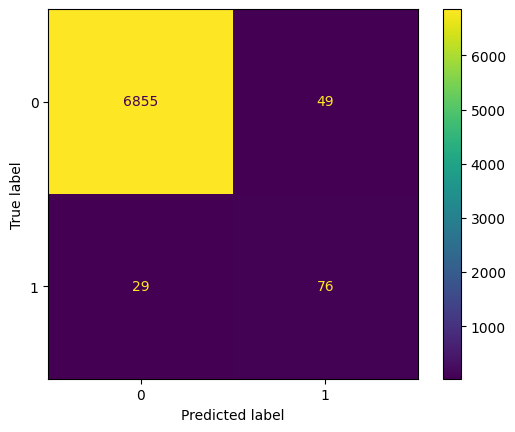

In [ ]:
#Machine Learning Algorithm : DECISION TREE (DT)

from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier()
classifierDT.fit(X_train, y_train)
predDT_y = classifierDT.predict(X_test)
#accuracy
acc_DT = accuracy_score(y_test, predDT_y)
print("Accuracy:", acc_DT)
#precision
pre_DT = precision_score(y_test, predDT_y, average='weighted')
print('Precision:', pre_DT)
#recall
rec_DT = recall_score(y_test, predDT_y, average='weighted')
print('Recall:', rec_DT)
#f1 score
f1_DT = f1_score(y_test, predDT_y, average='weighted')
print("F1 Score:", f1_DT)
#confusion matrix
cm_DT = confusion_matrix(y_test, predDT_y)
disp_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=classifierDT.classes_)
print('classification report:',classification_report(y_test,predDT_y))

disp_DT.plot()
plt.show()

Accuracy: 0.9850192609502069
Precision: 0.9702629444428917
Recall: 0.9850192609502069
F1 Score: 0.9775854204844718
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6904
           1       0.00      0.00      0.00       105

    accuracy                           0.99      7009
   macro avg       0.49      0.50      0.50      7009
weighted avg       0.97      0.99      0.98      7009



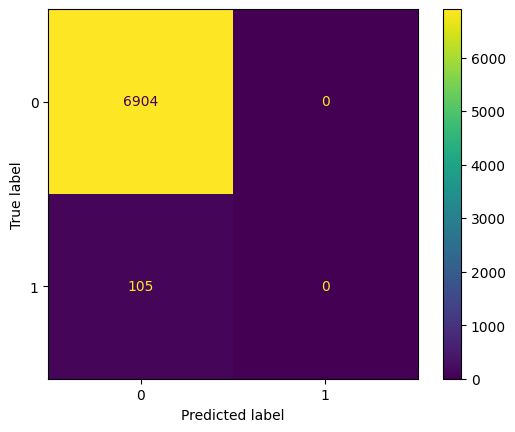

In [ ]:
#Machine Learning Algorithm : MLP
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)
predMLP_y= mlp_classifier.predict(X_test)
#accuracy
acc_MLP = accuracy_score(y_test, predMLP_y)
print("Accuracy:", acc_MLP)
#precision
pre_MLP = precision_score(y_test, predMLP_y, average='weighted')
print('Precision:', pre_MLP)
#recall
rec_MLP = recall_score(y_test, predMLP_y, average='weighted')
print('Recall:', rec_MLP)
#f1 score
f1_MLP = f1_score(y_test, predMLP_y, average='weighted')
print("F1 Score:", f1_MLP)
#confusion matrix
cm_mlp = confusion_matrix(y_test, predMLP_y)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
print('Classification Report:')
print(classification_report(y_test, predMLP_y))

disp_mlp.plot()
plt.show()

Accuracy: 0.9850192609502069
Precision: 0.9702629444428917
Recall: 0.9850192609502069
F1 Score: 0.9775854204844718
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6904
           1       0.00      0.00      0.00       105

    accuracy                           0.99      7009
   macro avg       0.49      0.50      0.50      7009
weighted avg       0.97      0.99      0.98      7009



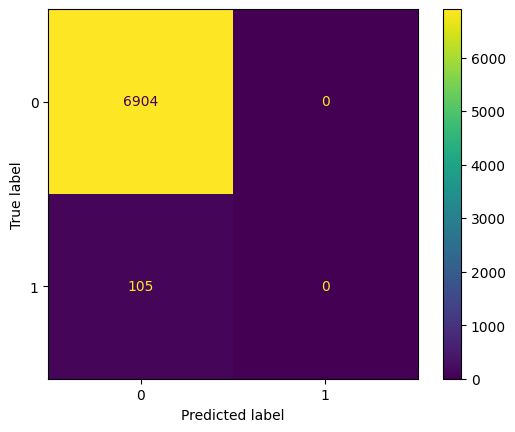

In [ ]:
#Machine Learning Algorithm : Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
predNB_y = nb_classifier.predict(X_test)
# accuracy
acc_NB = accuracy_score(y_test, predNB_y)
print("Accuracy:", acc_NB)
# precision
pre_NB = precision_score(y_test, predNB_y, average='weighted')
print('Precision:', pre_NB)
# recall
rec_NB = recall_score(y_test, predNB_y, average='weighted')
print('Recall:', rec_NB)
# f1 score
f1_NB = f1_score(y_test, predNB_y, average='weighted')
print("F1 Score:", f1_NB)
# confusion matrix
cm_nb = confusion_matrix(y_test, predNB_y)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
print('Classification Report:')
print(classification_report(y_test, predNB_y))

disp_nb.plot()
plt.show()

Available models: ['KNN', 'Decision Tree', 'MLP', 'Naive Bayes']


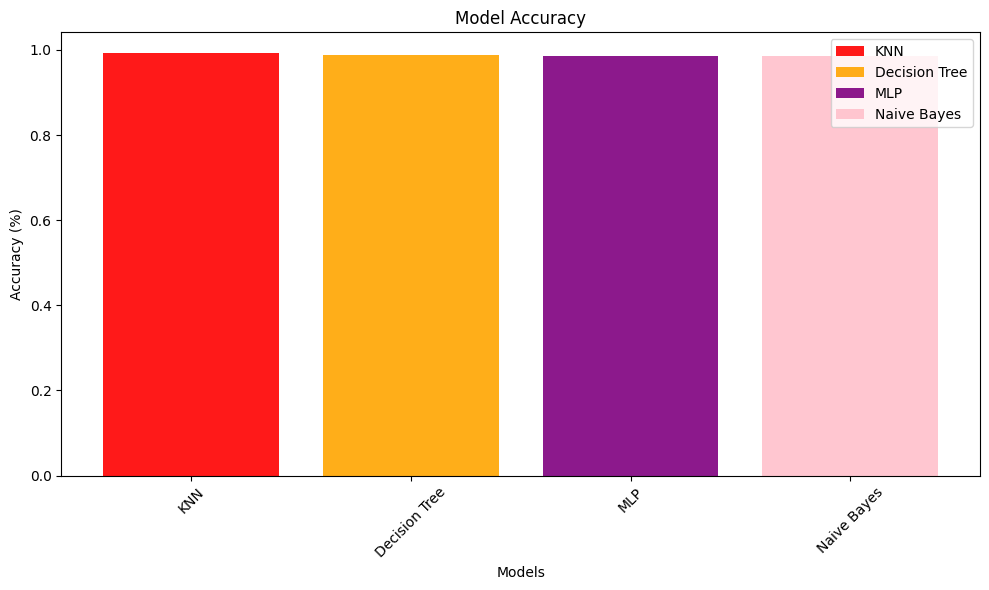

In [ ]:
import matplotlib.pyplot as plt
#Drawing boxplot in different colours for the 3 different Machine Learning Algorithm: KNN,DT,Naive Bayes and MLP

models = ['KNN','Decision Tree','MLP','Naive Bayes']
accuracies = [acc_KNN,acc_DT,acc_MLP,acc_NB]

print("Available models:", models)

selected_models =['KNN','Decision Tree','MLP','Naive Bayes']
selected_accuracies = [acc_KNN,acc_DT,acc_MLP,acc_NB]

colors = ['red','orange', 'purple', 'pink']

plt.figure(figsize=(10, 6))
for i, (model, accuracy, color) in enumerate(zip(selected_models, selected_accuracies, colors)):
    plt.bar(model, accuracy, color=color, alpha=0.9, label=model)

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.xticks(rotation=45, ha='center')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#printing all the accuracies together
print('Accuracy for KNN:', acc_KNN)
print('Accuracy for DT:', acc_DT)
print('Accuracy for MLP:', acc_MLP)
print('Accuracy for NB:', acc_NB)

Accuracy for KNN: 0.9917249250963047
Accuracy for DT: 0.9888714509915822
Accuracy for MLP: 0.9850192609502069
Accuracy for NB: 0.9850192609502069


In [ ]:
#printing all the precision together
print('Precision for KNN:', pre_KNN)
print('Precision for DT:', pre_DT)
print('Precision for MLP:', pre_MLP)
print('Precision for NB:', pre_NB)

Precision for KNN: 0.9909372159111629
Precision for DT: 0.989977992104283
Precision for MLP: 0.9702629444428917
Precision for NB: 0.9702629444428917


In [ ]:
#printing all the recall together
print('Recall for KNN:', rec_KNN)
print('Recall for DT:', rec_DT)
print('Recall for MLP:', rec_MLP)
print('Recall for NB:', rec_NB)

Recall for KNN: 0.9917249250963047
Recall for DT: 0.9888714509915822
Recall for MLP: 0.9850192609502069
Recall for NB: 0.9850192609502069


In [ ]:
#printing all the F1 together
print('F1 Score for KNN:', f1_KNN)
print('F1 Score  for DT:', f1_DT)
print('F1 Score  for MLP:', f1_MLP)
print('F1 Score  for NB:', f1_NB)

F1 Score for KNN: 0.9909357910905382
F1 Score  for DT: 0.9893472297641006
F1 Score  for MLP: 0.9775854204844718
F1 Score  for NB: 0.9775854204844718
